In [1]:
import numpy as np
from scipy.stats import norm, multivariate_normal
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
np.random.seed(1)

In [20]:
n = 3
C = 3
priors = np.array([0.3,0.3,0.4])
meanc = np.array([[2,0,0],[0,2,2],[0,2,0],[2,0,2]])
#print(meanc)
covc  = {}
cov_0 = np.array([[1,   0,   1  ],
             [0,   1,   0  ],
             [0,   0, 1  ]])
cov_1 = np.array([[1,   1,   0  ],
             [0,   1,   0  ],
             [0,   0, 1  ]])
cov_2 = np.array([[1,   0,   0  ],
             [0,   1,   1  ],
             [0,   0, 1  ]])
cov_3 = np.array([[1,   0,   0  ],
             [0,   1,   0  ],
             [0,   0, 1  ]])
# cov_0 = np.eye(3)
# cov_1 = np.eye(3)
# cov_2 = np.eye(3)
# cov_3 = np.eye(3)

In [21]:
nsamples = 10000
nsize = np.zeros(4)
for i in range(0, nsamples) :
    r = np.random.rand()
    if(r < priors[0]):
        nsize[0] = nsize[0] + 1
    elif(r < priors[0]+priors[1]):
        nsize[1] = nsize[1] + 1
    elif(r < priors[0]+priors[1]+priors[2]/2):
        nsize[2] = nsize[2] + 1
    else:
        nsize[3] = nsize[3] + 1
nsize = nsize.astype(int)
print(nsize)

[2995 2964 2012 2029]


In [22]:
#print(meanc[0],cov_0,nsize[0])
samplec1 = multivariate_normal.rvs(mean=meanc[0],cov=cov_0,size=int(nsize[0]))
label1 = pd.DataFrame(np.ones(nsize[0],dtype=int))
samplec1 = pd.DataFrame(samplec1)
samplec1 = pd.concat([samplec1,label1],axis=1,ignore_index=True)

samplec2 = multivariate_normal.rvs(mean=meanc[1],cov=cov_1,size=int(nsize[1]))
label2 = pd.DataFrame(np.ones(nsize[1],dtype=int)*2)
samplec2 = pd.DataFrame(samplec2)
samplec2 = pd.concat([samplec2,label2],axis=1,ignore_index=True)

samplec3a = multivariate_normal.rvs(mean=meanc[2],cov=cov_2,size=int(nsize[2]))
label3a = pd.DataFrame(np.ones(nsize[2],dtype=int)*3)
samplec3a = pd.DataFrame(samplec3a)
samplec3a = pd.concat([samplec3a,label3a],axis=1,ignore_index=True)

samplec3b = multivariate_normal.rvs(mean=meanc[3],cov=cov_3,size=int(nsize[3]))
label3b = pd.DataFrame(np.ones(nsize[3],dtype=int)*3)
samplec3b = pd.DataFrame(samplec3b)
samplec3b = pd.concat([samplec3b,label3b],axis=1,ignore_index=True)

samples = pd.concat([samplec1,samplec2,samplec3a,samplec3b],axis=0,ignore_index=True)
print(samples)

             0         1         2  3
0     2.313133  1.324345  1.065028  1
1     3.648929  1.165719  1.604944  1
2     1.908234 -1.504833 -1.731091  1
3     0.991671  1.581367 -1.372205  1
4     1.757773  1.663765  0.407579  1
...        ...       ...       ... ..
9995  1.243682 -1.159451  0.699125  3
9996  2.566553  1.691597  0.815888  3
9997  1.163538 -0.600076  0.129023  3
9998  1.191564 -0.567825  2.328342  3
9999  1.720226 -0.265067  2.690131  3

[10000 rows x 4 columns]


c:\Users\SaiVenky\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_multivariate.py:757: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


In [23]:
samples = np.array(samples)
print(samples)
nclasses = np.unique(samples[:,-1]).astype(int)
print(nclasses)

[[ 2.31313273  1.32434527  1.06502753  1.        ]
 [ 3.64892851  1.16571892  1.60494361  1.        ]
 [ 1.90823419 -1.50483269 -1.73109053  1.        ]
 ...
 [ 1.16353771 -0.60007623  0.12902269  3.        ]
 [ 1.19156364 -0.56782459  2.32834222  3.        ]
 [ 1.72022622 -0.26506747  2.69013123  3.        ]]
[1 2 3]


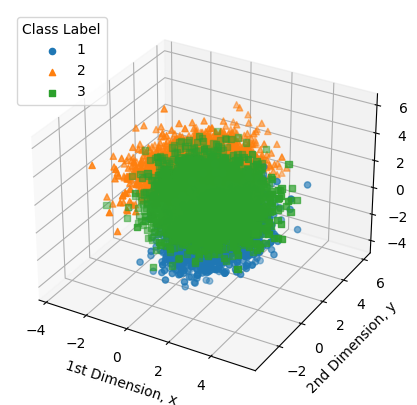

In [24]:
fig = plt.figure(figsize = (5,5))
#fig.subplots_adjust(left=0.01, right=0.985, top=0.99, bottom=0.01, wspace=0)
ax = plt.axes(projection ="3d")
samples_1 = samples[samples[:,-1]==1]
samples_2 = samples[samples[:,-1]==2]
samples_3 = samples[samples[:,-1]==3]
x_1 = samples_1[:,0]
y_1 = samples_1[:,1]
z_1 = samples_1[:,2]
x_2 = samples_2[:,0]
y_2 = samples_2[:,1]
z_2 = samples_2[:,2]
x_3 = samples_3[:,0]
y_3 = samples_3[:,1]
z_3 = samples_3[:,2]
ax.scatter3D(x_1, y_1, z_1, label='1', marker='o')
ax.scatter3D(x_2, y_2, z_2, label='2', marker='^')
ax.scatter3D(x_3, y_3, z_3, label='3', marker='s')
#ax.set_title("Samples from Multivariate Gaussian Distributions")
ax.set_xlabel('1st Dimension, x')
ax.set_ylabel('2nd Dimension, y')
ax.set_zlabel('3rd Dimension, z')
ax.legend(loc='upper left', title='Class Label')
plt.show()

In [25]:
pdfs = [
    multivariate_normal.pdf(samples[:,:-1], mean=meanc[0], cov=cov_0),
    multivariate_normal.pdf(samples[:,:-1], mean=meanc[1], cov=cov_1),
    0.5 * multivariate_normal.pdf(samples[:,:-1], mean=meanc[2], cov=cov_2) +
    0.5 * multivariate_normal.pdf(samples[:,:-1], mean=meanc[3], cov=cov_3)
]
pdfs = np.array(pdfs)
# Posterior probabilities
posteriors = pdfs.T * priors


# Bayes classifier decision rule (0-1 loss)
decisions_01 = np.argmax(posteriors, axis=1) + 1

# Loss matrices
Lambda_10 = np.array([[0, 1, 10], [1, 0, 10], [1, 1, 0]])
Lambda_100 = np.array([[0, 1, 100], [1, 0, 100], [1, 1, 0]])

# Compute expected risks
risk_10 = np.dot(posteriors, Lambda_10)
risk_100 = np.dot(posteriors, Lambda_100)

# ERM decision rules
decisions_10 = np.argmin(risk_10, axis=1) + 1
decisions_100 = np.argmin(risk_100, axis=1) + 1

In [26]:
from sklearn.metrics import confusion_matrix

labels = samples[:,-1]
# Confusion matrices
conf_matrix_01 = confusion_matrix(labels, decisions_01)
conf_matrix_10 = confusion_matrix(labels, decisions_10)
conf_matrix_100 = confusion_matrix(labels, decisions_100)

# Normalize the confusion matrices by number of samples
conf_matrix_01 = conf_matrix_01 / nsamples
conf_matrix_10 = conf_matrix_10 / nsamples
conf_matrix_100 = conf_matrix_100 / nsamples

print("Confusion Matrix (0-1 loss):\n", conf_matrix_01)
print("Confusion Matrix (Lambda_10):\n", conf_matrix_10)
print("Confusion Matrix (Lambda_100):\n", conf_matrix_100)

Confusion Matrix (0-1 loss):
 [[0.2386 0.003  0.0579]
 [0.0026 0.2539 0.0399]
 [0.0569 0.0598 0.2874]]
Confusion Matrix (Lambda_10):
 [[0.2865 0.0077 0.0053]
 [0.0071 0.2884 0.0009]
 [0.1664 0.155  0.0827]]
Confusion Matrix (Lambda_100):
 [[0.2906 0.0086 0.0003]
 [0.0072 0.2892 0.    ]
 [0.2083 0.1908 0.005 ]]


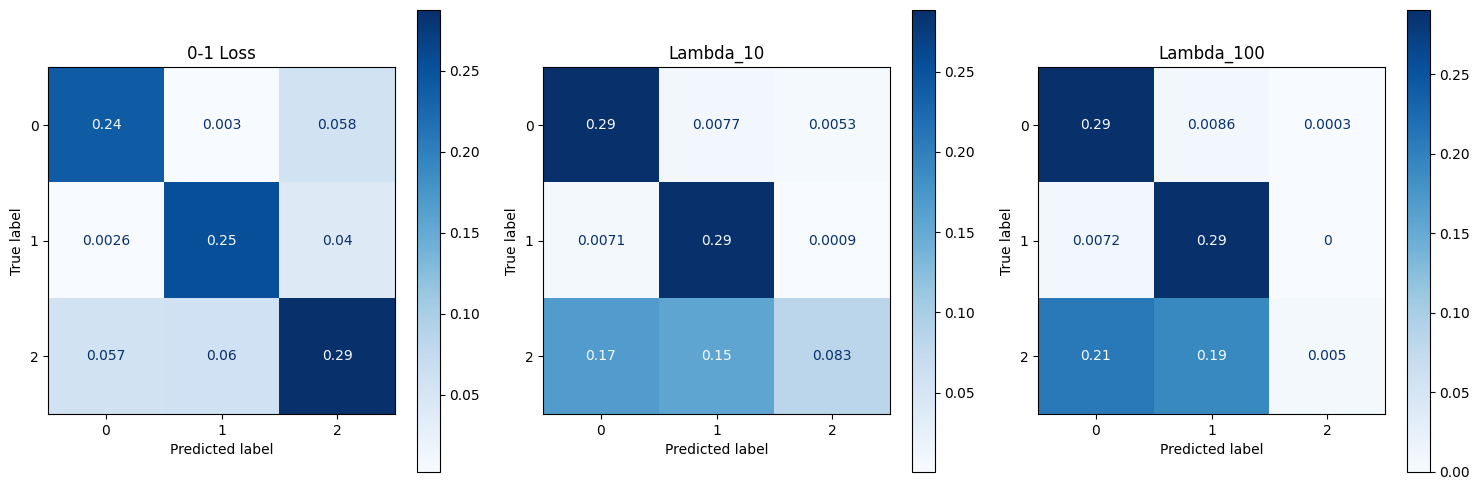

In [27]:
# Create ConfusionMatrixDisplay objects
cm_display_01 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_01)
cm_display_10 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_10)
cm_display_100 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_100)

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

cm_display_01.plot(ax=axes[0], cmap='Blues', xticks_rotation='horizontal')
axes[0].set_title('0-1 Loss')

cm_display_10.plot(ax=axes[1], cmap='Blues', xticks_rotation='horizontal')
axes[1].set_title('Lambda_10')

cm_display_100.plot(ax=axes[2], cmap='Blues', xticks_rotation='horizontal')
axes[2].set_title('Lambda_100')

plt.tight_layout()
plt.show()

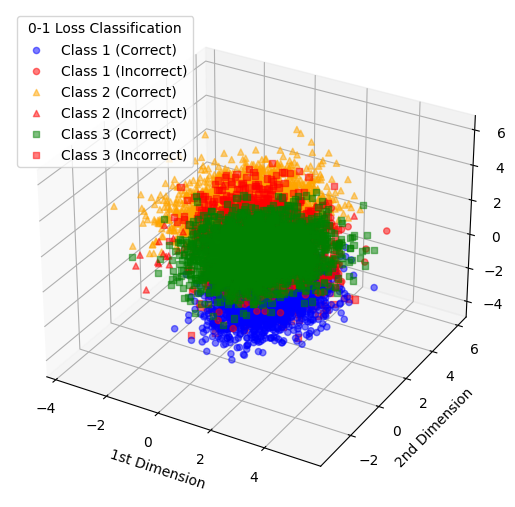

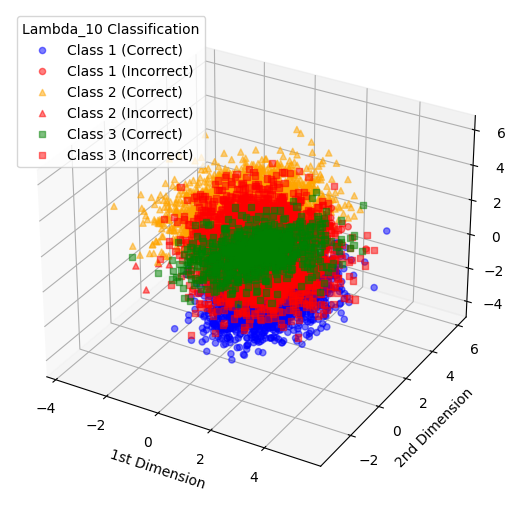

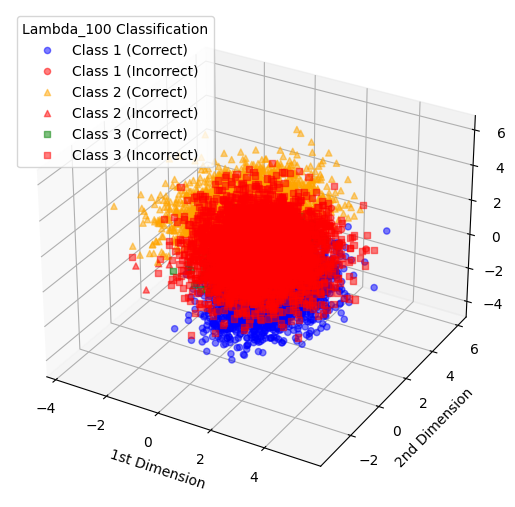

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to plot samples for a given loss
def plot_samples(samples, decisions, correct_labels, labels, loss_name):
    fig = plt.figure(figsize=(5, 5))
    fig.subplots_adjust(left=0.01, right=0.985, top=0.99, bottom=0.01, wspace=0)
    ax = plt.axes(projection="3d")

    # Define marker shapes and colors for each class
    class_markers = {'Class 1': 'o', 'Class 2': '^', 'Class 3': 's'}
    class_colors = {'Class 1': 'blue', 'Class 2': 'orange', 'Class 3': 'green'}

    # Separate samples based on classification and correctness
    for class_label in range(1, 4):
        class_samples = samples[labels == class_label]
        correct_samples = class_samples[decisions[labels == class_label] == class_label]
        incorrect_samples = class_samples[decisions[labels == class_label] != class_label]

        # Extract coordinates for each class
        x_correct, y_correct, z_correct = correct_samples[:, 0], correct_samples[:, 1], correct_samples[:, 2]
        x_incorrect, y_incorrect, z_incorrect = incorrect_samples[:, 0], incorrect_samples[:, 1], incorrect_samples[:, 2]

        # Scatter plot for correct classifications
        ax.scatter3D(x_correct, y_correct, z_correct, label=f'Class {class_label} (Correct)', marker=class_markers[f'Class {class_label}'], alpha=0.5, color=class_colors[f'Class {class_label}'])

        # Scatter plot for incorrect classifications
        ax.scatter3D(x_incorrect, y_incorrect, z_incorrect, label=f'Class {class_label} (Incorrect)', marker=class_markers[f'Class {class_label}'], alpha=0.5, color='red')

    # Set labels and legend
    ax.set_xlabel('1st Dimension')
    ax.set_ylabel('2nd Dimension')
    ax.set_zlabel('3rd Dimension')
    ax.legend(loc='upper left', title=f'{loss_name} Classification')

    plt.show()

# Plot for 0-1 loss
plot_samples(samples, decisions_01, labels, labels, '0-1 Loss')

# Plot for Lambda_10
plot_samples(samples, decisions_10, labels, labels, 'Lambda_10')

# Plot for Lambda_100
plot_samples(samples, decisions_100, labels, labels, 'Lambda_100')
